**Лабораторная работа 1**

ИУ5И-21М Хаммуд Хала

**Цель работы**

Изучение различных методов визуализация данных и создание истории на основе данных

**Задание**

Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.
Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.

Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.

Сформировать отчет и разместить его в своем репозитории на github.
Средства и способы визуализации данных можно посмотреть здесь.

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
# Загрузка набора данных о ценах на жильё в Калифорнии
from sklearn.datasets import fetch_california_housing

# Загрузка данных
housing = fetch_california_housing()

# Преобразование данных в DataFrame
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

# Добавляем целевую переменную (цена жилья в сотнях тысяч долларов)
df['target'] = housing.target


In [3]:
# Получение общей информации о наборе данных
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
# Просмотр первых 5 строк набора данных
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Основные статистические характеристики набора данных
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
# Определим минимальное, максимальное и уникальные значения для целевой переменной
print("Минимальная цена:", df['target'].min())
print("Максимальная цена:", df['target'].max())
print("Уникальные значения (первые 10):", df['target'].unique()[:10])


Минимальная цена: 0.14999
Максимальная цена: 5.00001
Уникальные значения (первые 10): [4.526 3.585 3.521 3.413 3.422 2.697 2.992 2.414 2.267 2.611]


**Визуальное исследование датасета**

Будем рассматривать основные задачи:
анализ распределения цен на жильё,
сравнение по возрасту зданий и количеству комнат,
а также изучение влияния географического положения на стоимость недвижимости.

Для каждой задачи опишем, какой график рекомендуется, почему он подходит, а также какие альтернативы менее удачны и могут ввести в заблуждение.



**1. Анализ распределения цен на жильё**


Рекомендуемый график:

Гистограмма с наложенной KDE (плотность)

Почему именно этот график:

Стоимость жилья (target) — это количественная переменная.
Гистограмма позволяет увидеть форму распределения цен, наличие асимметрии, выбросов и экстремальных значений.
Наложенная KDE (оценка плотности) помогает увидеть сглаженную кривую распределения, что полезно для анализа модальности (одномодальность, мультимодальность и т.д.).

Альтернативы и их недостатки:

Круговая диаграмма (Pie Chart): Не подходит для количественных данных. Она предназначена для отображения категориальных переменных и не даёт понимания распределения количественного признака.

Столбчатая диаграмма (Bar Chart): Хороша для категориальных данных, но при анализе непрерывных переменных теряются детали формы распределения.



**Плотность цен на жильё по возрасту домов (kdeplot)**

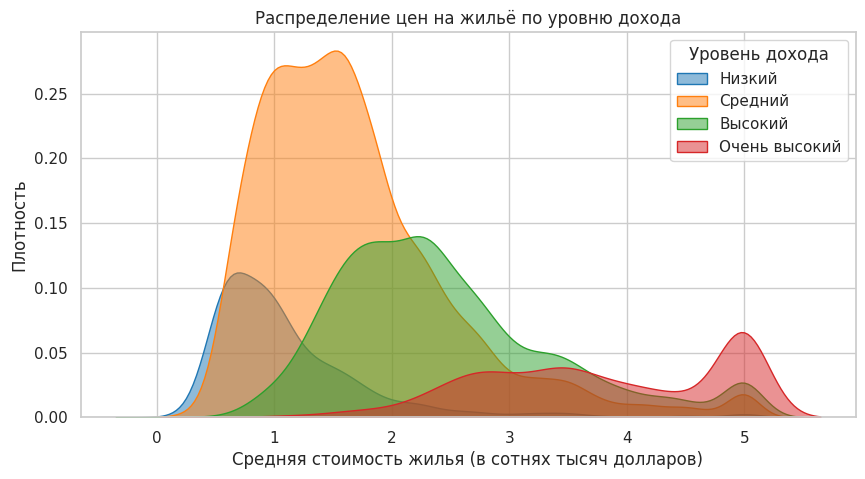

In [7]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Загрузка данных
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['target'] = housing.target

# Создание новой категориальной переменной по уровню дохода
def income_category(med_inc):
    if med_inc < 2:
        return 'Низкий доход'
    elif med_inc < 4:
        return 'Средний доход'
    elif med_inc < 6:
        return 'Высокий доход'
    else:
        return 'Очень высокий доход'

df['income_level'] = df['MedInc'].apply(income_category)

# Настройки графиков
sns.set(style="whitegrid")

# Определяем палитру цветов
income_palette = {
    "Низкий доход": "#1f77b4",
    "Средний доход": "#ff7f0e",
    "Высокий доход": "#2ca02c",
    "Очень высокий доход": "#d62728"
}

# Плотность цен на жильё по уровню дохода
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="target", hue="income_level", fill=True, alpha=0.5, palette=income_palette)
plt.title("Распределение цен на жильё по уровню дохода")
plt.xlabel("Средняя стоимость жилья (в сотнях тысяч долларов)")
plt.ylabel("Плотность")
plt.legend(title="Уровень дохода", labels=["Низкий", "Средний", "Высокий", "Очень высокий"])
plt.show()


**Плотность цен на жильё по возрасту домов (kdeplot)**

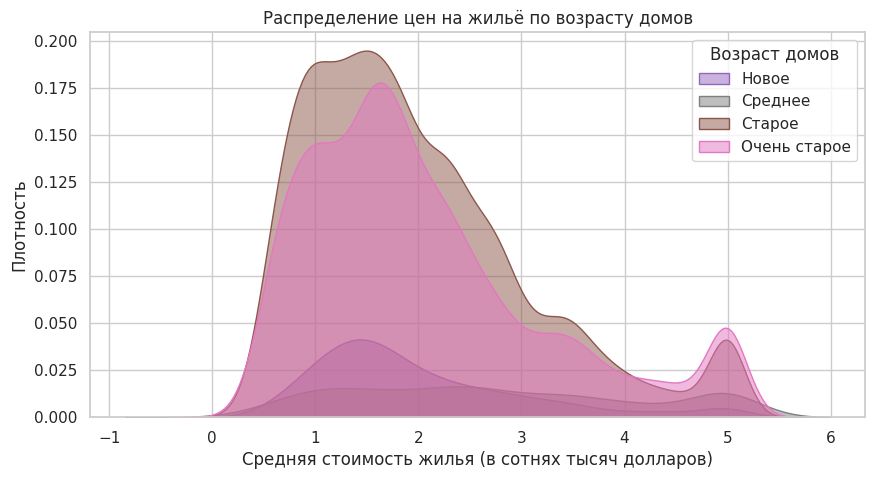

In [10]:
# Плотность цен на жильё по возрасту домов (kdeplot)

# Устанавливаем стиль графиков
sns.set(style="whitegrid")

# Определяем палитру цветов для возрастных категорий
age_palette = {
    "Новое": "#9467bd",
    "Среднее": "#8c564b",
    "Старое": "#e377c2",
    "Очень старое": "#7f7f7f"
}

# Создание новой категориальной переменной по возрасту домов
def house_age_category(age):
    if age <= 10:
        return 'Новое'
    elif age <= 30:
        return 'Среднее'
    elif age <= 50:
        return 'Старое'
    else:
        return 'Очень старое'

# Если еще не создан, создаем новый столбец
if 'house_age_category' not in df.columns:
    df['house_age_category'] = df['HouseAge'].apply(house_age_category)

# Построение графика плотности
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="target", hue="house_age_category", fill=True, alpha=0.5, palette=age_palette)
plt.title("Распределение цен на жильё по возрасту домов")
plt.xlabel("Средняя стоимость жилья (в сотнях тысяч долларов)")
plt.ylabel("Плотность")
plt.legend(title="Возраст домов", labels=["Новое", "Среднее", "Старое", "Очень старое"])
plt.show()




**Гистограмма распределения цен на жильё**

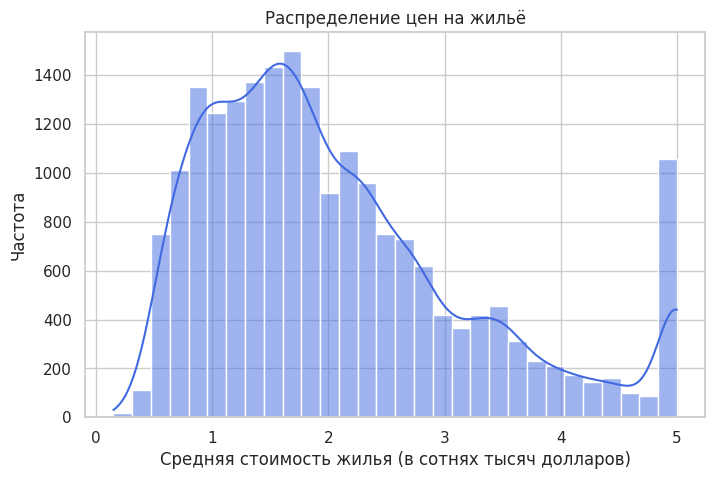

In [11]:
# Гистограмма распределения цен на жильё

import matplotlib.pyplot as plt
import seaborn as sns

# Строим гистограмму
plt.figure(figsize=(8, 5))
sns.histplot(df['target'], bins=30, kde=True, color='royalblue')
plt.xlabel('Средняя стоимость жилья (в сотнях тысяч долларов)')
plt.ylabel('Частота')
plt.title('Распределение цен на жильё')
plt.show()


**2. Зависимость стоимости жилья от уровня дохода**

Рекомендуемый график:

Boxplot (ящик с усами)

Почему именно этот график:

В нашем датасете переменная income_level (уровень дохода населения) является категориальной, а target (стоимость жилья) — количественной переменной.
Boxplot позволяет сравнить медиану, квартили и выявить выбросы цен на жильё для разных уровней дохода.
Это помогает понять, как изменяется разброс цен в зависимости от благосостояния населения.

Альтернативы и их недостатки:

Stacked Bar Chart (слоёная столбчатая диаграмма): Показывает только суммарную информацию без детальной структуры внутри категорий, поэтому плохо подходит для анализа вариативности цен.

Violin Plot: Может быть полезен для отображения плотности распределения, но при наличии выбросов или малом количестве данных boxplot выглядит более привычно и читаемо.



<ipython-input-12-db5568ff78e5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income_level', y='target', data=df, palette='coolwarm')


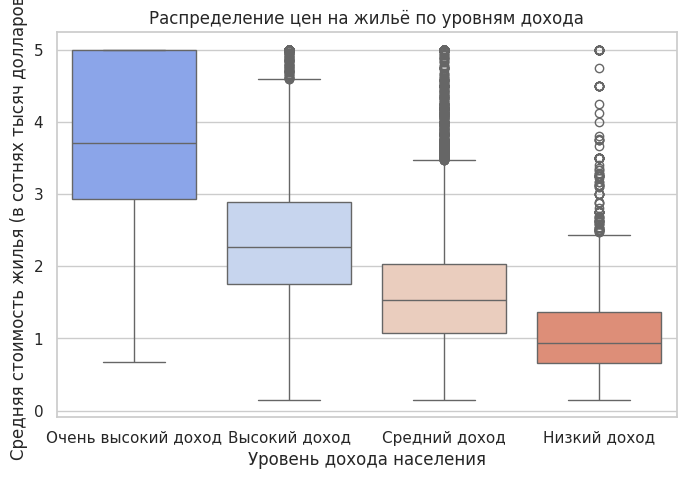

In [12]:
# Ящик с усами: распределение цен на жильё по уровню дохода

plt.figure(figsize=(8, 5))
sns.boxplot(x='income_level', y='target', data=df, palette='coolwarm')
plt.xlabel('Уровень дохода населения')
plt.ylabel('Средняя стоимость жилья (в сотнях тысяч долларов)')
plt.title('Распределение цен на жильё по уровням дохода')
plt.show()


**3. Изучение влияния возраста домов на стоимость жилья**

Определяем тип данных:
У нас есть две переменные:

Возраст домов (house_age_category) — категориальная (дискретная), так как принимает 4 значения:

"Новое" (0–10 лет)

"Среднее" (11–30 лет)

"Старое" (31–50 лет)

"Очень старое" (более 50 лет)

Средняя стоимость жилья (target) — числовая (непрерывная).

По дереву Data-to-Viz:
Если у нас есть категориальная переменная + числовая переменная, рекомендуется использовать:

Боксплот (Boxplot) — если хотим сравнить распределения между группами.

Виолончельный график (Violin plot) — если хотим дополнительно показать плотность распределения.

Плотностные графики (Density plot) — если хотим сравнить формы распределений между категориями.



<ipython-input-13-df3ca6495b80>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="house_age_category", y="target", data=df, palette=palette, inner="quartile")


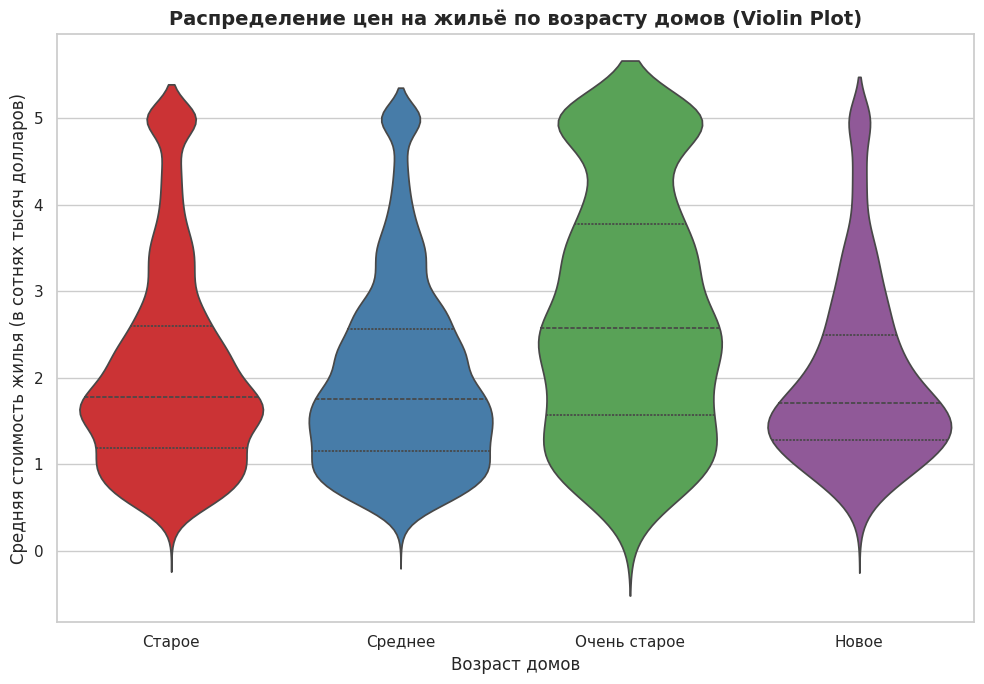

In [13]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Загрузка данных
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['target'] = housing.target

# Создание новой категориальной переменной по возрасту домов
def house_age_category(age):
    if age <= 10:
        return 'Новое'
    elif age <= 30:
        return 'Среднее'
    elif age <= 50:
        return 'Старое'
    else:
        return 'Очень старое'

df['house_age_category'] = df['HouseAge'].apply(house_age_category)

# Устанавливаем стиль
sns.set_theme(style="whitegrid")

# Палитра цветов
palette = "Set1"  # Используем палитру Set1 для цветов

# Создаём фигуру для графика
plt.figure(figsize=(10, 7))

# Виолончельный график (Violin Plot) распределения цен на жильё по возрасту домов
sns.violinplot(x="house_age_category", y="target", data=df, palette=palette, inner="quartile")
plt.title("Распределение цен на жильё по возрасту домов (Violin Plot)", fontsize=14, fontweight="bold")
plt.xlabel("Возраст домов", fontsize=12)
plt.ylabel("Средняя стоимость жилья (в сотнях тысяч долларов)", fontsize=12)

# Показываем график
plt.tight_layout()
plt.show()


**4. Столбчатая диаграмма количества домов по возрастным категориям**

Что показывает:
Показывает, сколько домов в каждом возрастном диапазоне (новые, средние, старые, очень старые).
Это позволяет понять, какие типы домов доминируют в наборе данных.

На что обратить внимание:

Если много мелких возрастных групп, можно оставить только основные категории ("Новое", "Среднее", "Старое", "Очень старое").

Следует учитывать возможное влияние возраста домов на стоимость жилья при дальнейших анализах.

📊 Bar Chart (столбчатая диаграмма) — отлично подходит для отображения количества объектов в каждой категории.

⚠️ Ошибка:
Не сортировать категории по логическому возрасту или количеству — это может затруднить анализ.



<ipython-input-14-b81e1809224b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=house_age_counts.index, y=house_age_counts.values, palette='viridis')


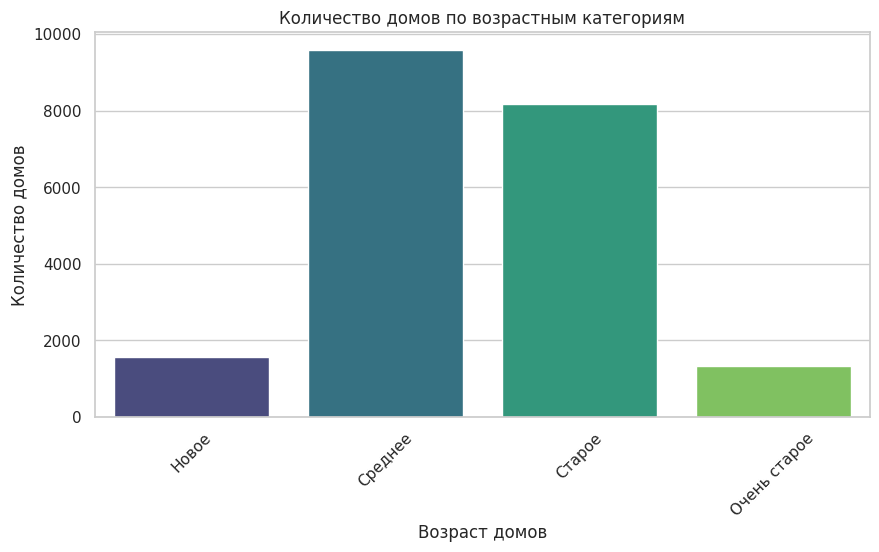

In [14]:
# Столбчатая диаграмма количества домов по возрастным категориям

plt.figure(figsize=(10, 5))

# Считаем количество домов в каждой возрастной категории
house_age_counts = df['house_age_category'].value_counts().reindex(['Новое', 'Среднее', 'Старое', 'Очень старое'])

# Строим столбчатую диаграмму
sns.barplot(x=house_age_counts.index, y=house_age_counts.values, palette='viridis')
plt.xlabel('Возраст домов')
plt.ylabel('Количество домов')
plt.title('Количество домов по возрастным категориям')
plt.xticks(rotation=45)
plt.show()


Эволюция средней стоимости жилья в зависимости от возраста дома (HouseAge) — Линейный график
Когда использовать:
Если интересует динамика изменения средней стоимости жилья в зависимости от возраста домов.

Почему:
Линейный график позволяет наглядно увидеть тренд изменения цен — например, дешевеют ли дома с увеличением их возраста.
Это помогает понять взаимосвязь между состоянием недвижимости и её рыночной стоимостью.

Недостатки:
Если данные сильно разбросаны или в отдельных возрастных группах мало наблюдений, тренд может быть неточным.
Рекомендуется агрегировать данные (например, усреднять цены для каждой возрастной группы).

📊 Line Chart (линейный график) — наилучший способ показать тренд изменения цен в зависимости от возраста домов.

⚠️ Ошибка:
Игнорировать нормализацию данных по возрасту (например, сглаживание при небольших выборках).



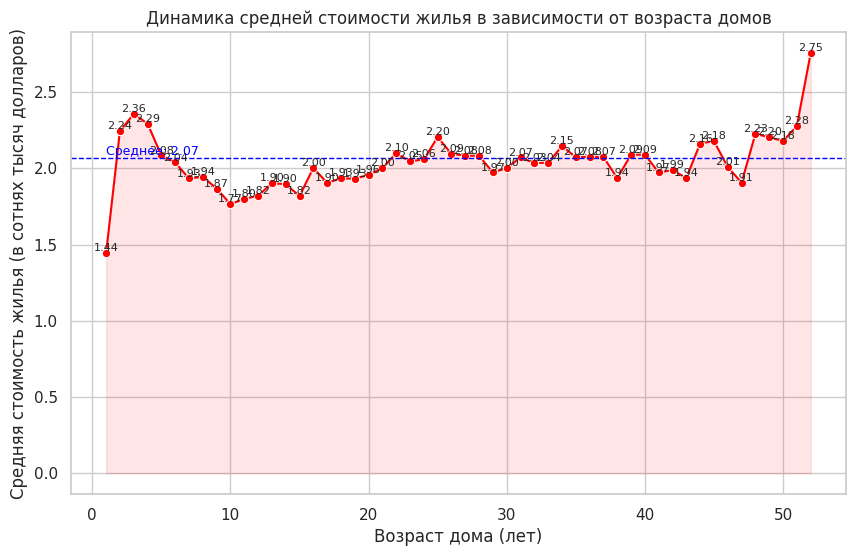

In [15]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Загрузка данных
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['target'] = housing.target

# Группировка данных по возрасту домов и вычисление средней стоимости жилья
age_price_trend = df.groupby('HouseAge')['target'].mean()

# Построение линейного графика
plt.figure(figsize=(10, 6))
sns.lineplot(x=age_price_trend.index, y=age_price_trend.values, marker='o', color='red')

# Добавление аннотаций для каждого значения
for age, price in age_price_trend.items():
    plt.text(age, price, f'{price:,.2f}', ha='center', va='bottom', fontsize=8)

# Добавление горизонтальной линии среднего значения
overall_mean = df['target'].mean()
plt.axhline(overall_mean, color='blue', linestyle='--', linewidth=1)
plt.text(age_price_trend.index.min(), overall_mean, f'Среднее: {overall_mean:,.2f}', color='blue', va='bottom', fontsize=9)

# Заполнение области под графиком
plt.fill_between(age_price_trend.index, age_price_trend.values, color='red', alpha=0.1)

# Настройка подписей и заголовка
plt.xlabel('Возраст дома (лет)')
plt.ylabel('Средняя стоимость жилья (в сотнях тысяч долларов)')
plt.title('Динамика средней стоимости жилья в зависимости от возраста домов')
plt.grid(True)
plt.show()


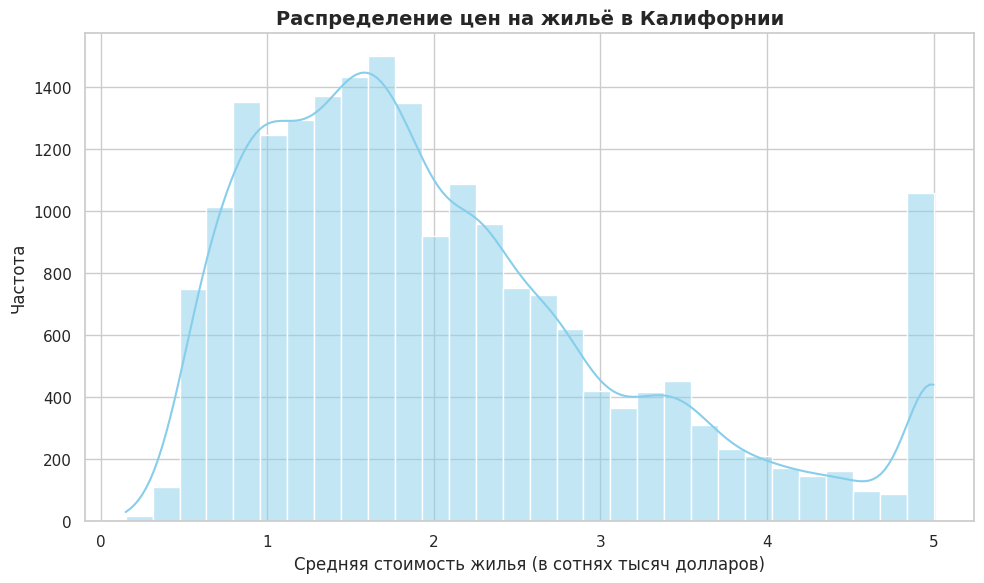

In [16]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Загрузка данных
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['target'] = housing.target

# Устанавливаем стиль Seaborn
sns.set_theme(style="whitegrid")

###########################################################
# 1. Распределение цен на жильё (Histogram + KDE)
###########################################################
plt.figure(figsize=(10, 6))
sns.histplot(df["target"], bins=30, kde=True, color="skyblue")
plt.title("Распределение цен на жильё в Калифорнии", fontsize=14, fontweight="bold")
plt.xlabel("Средняя стоимость жилья (в сотнях тысяч долларов)", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-17-8126b4ae0d0f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="income_level", y="target", data=df, palette="Set2")


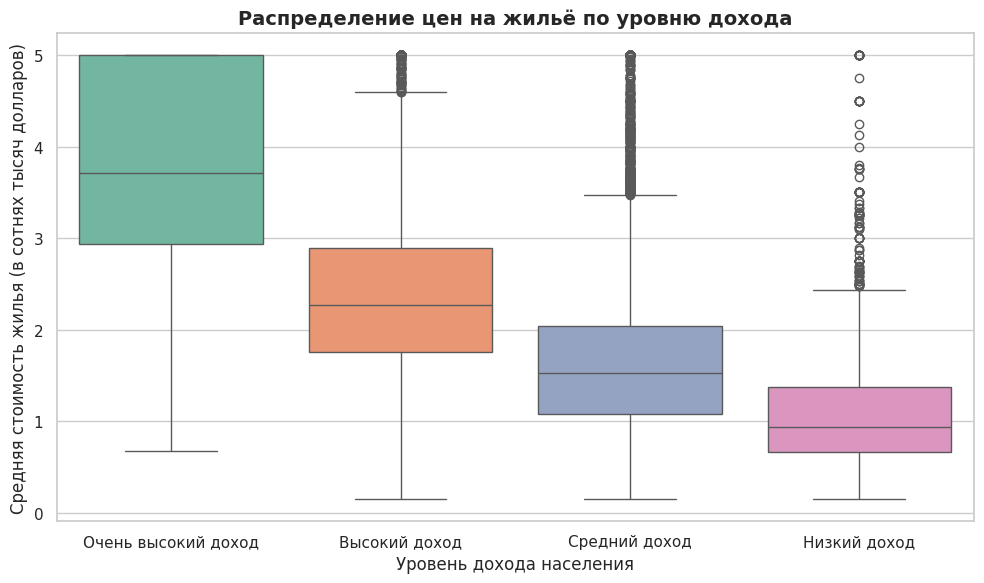

In [17]:
###########################################################
# 2. Boxplot: Стоимость жилья по уровню дохода (income_level)
###########################################################

# Создание новой категориальной переменной по уровню дохода
def income_category(med_inc):
    if med_inc < 2:
        return 'Низкий доход'
    elif med_inc < 4:
        return 'Средний доход'
    elif med_inc < 6:
        return 'Высокий доход'
    else:
        return 'Очень высокий доход'

# Если столбец ещё не создан, создаем его
if 'income_level' not in df.columns:
    df['income_level'] = df['MedInc'].apply(income_category)

# Строим boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="income_level", y="target", data=df, palette="Set2")
plt.title("Распределение цен на жильё по уровню дохода", fontsize=14, fontweight="bold")
plt.xlabel("Уровень дохода населения", fontsize=12)
plt.ylabel("Средняя стоимость жилья (в сотнях тысяч долларов)", fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-18-c17610dcdeb8>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="house_age_category", y="target", data=df, palette="Set3", inner="quartile")


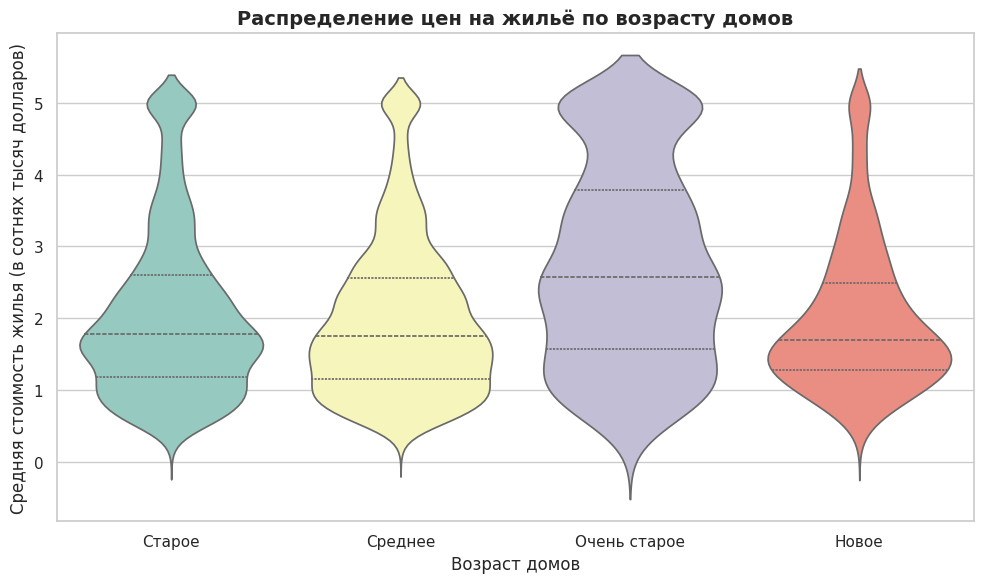

In [18]:
###########################################################
# 3. Violin Plot: Стоимость жилья по возрасту домов (house_age_category)
###########################################################

# Создание новой категориальной переменной по возрасту домов
def house_age_category(age):
    if age <= 10:
        return 'Новое'
    elif age <= 30:
        return 'Среднее'
    elif age <= 50:
        return 'Старое'
    else:
        return 'Очень старое'

# Если столбец ещё не создан, создаем его
if 'house_age_category' not in df.columns:
    df['house_age_category'] = df['HouseAge'].apply(house_age_category)

# Строим violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x="house_age_category", y="target", data=df, palette="Set3", inner="quartile")
plt.title("Распределение цен на жильё по возрасту домов", fontsize=14, fontweight="bold")
plt.xlabel("Возраст домов", fontsize=12)
plt.ylabel("Средняя стоимость жилья (в сотнях тысяч долларов)", fontsize=12)
plt.tight_layout()
plt.show()


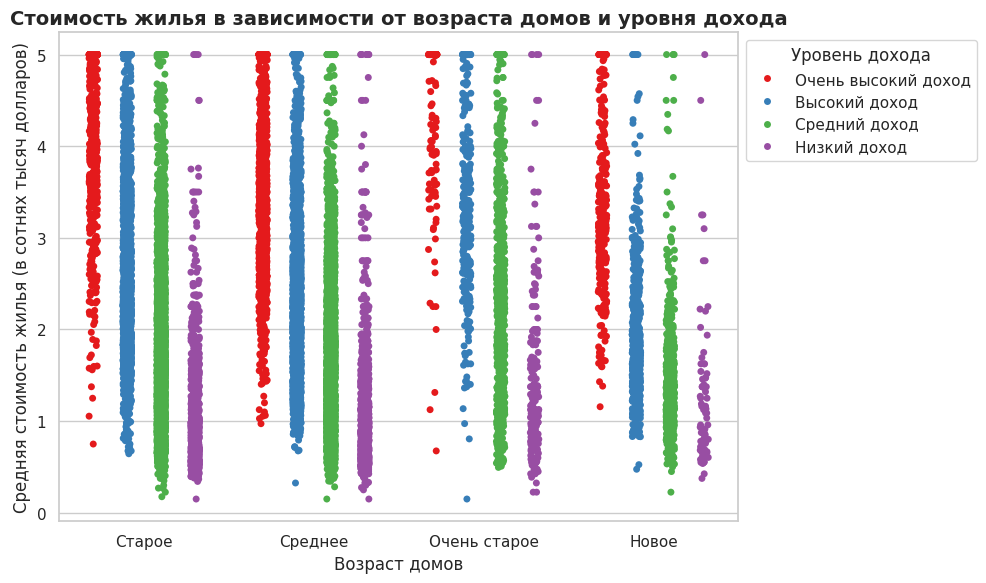

In [19]:
###########################################################
# 4. Scatter/Strip Plot: Стоимость жилья в зависимости от возраста дома
#    (цвет – уровень дохода населения)
###########################################################

plt.figure(figsize=(10, 6))
sns.stripplot(x="house_age_category", y="target", data=df, hue="income_level",
              palette="Set1", jitter=True, dodge=True)
plt.title("Стоимость жилья в зависимости от возраста домов и уровня дохода", fontsize=14, fontweight="bold")
plt.xlabel("Возраст домов", fontsize=12)
plt.ylabel("Средняя стоимость жилья (в сотнях тысяч долларов)", fontsize=12)
plt.legend(title="Уровень дохода", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


<ipython-input-20-822993f54edf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_income.values, y=avg_price_by_income.index, palette="viridis")


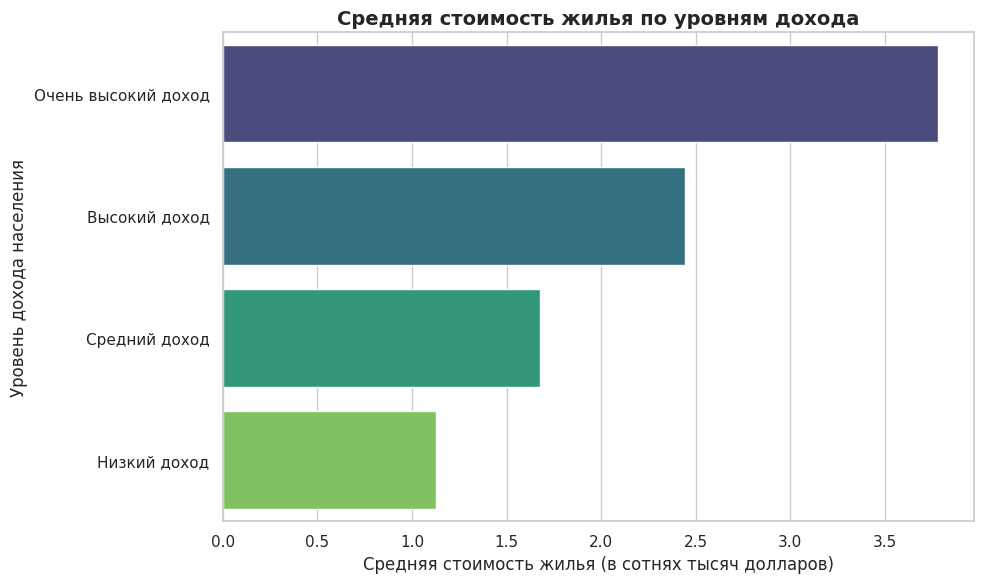

In [20]:
###########################################################
# 5. Bar Plot: Средняя стоимость жилья по уровням дохода
###########################################################

# Группируем данные: средняя стоимость жилья для каждого уровня дохода
avg_price_by_income = df.groupby("income_level")["target"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_income.values, y=avg_price_by_income.index, palette="viridis")
plt.title("Средняя стоимость жилья по уровням дохода", fontsize=14, fontweight="bold")
plt.xlabel("Средняя стоимость жилья (в сотнях тысяч долларов)", fontsize=12)
plt.ylabel("Уровень дохода населения", fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-21-94df51b2c8ed>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="house_age_category", data=df, palette="pastel")


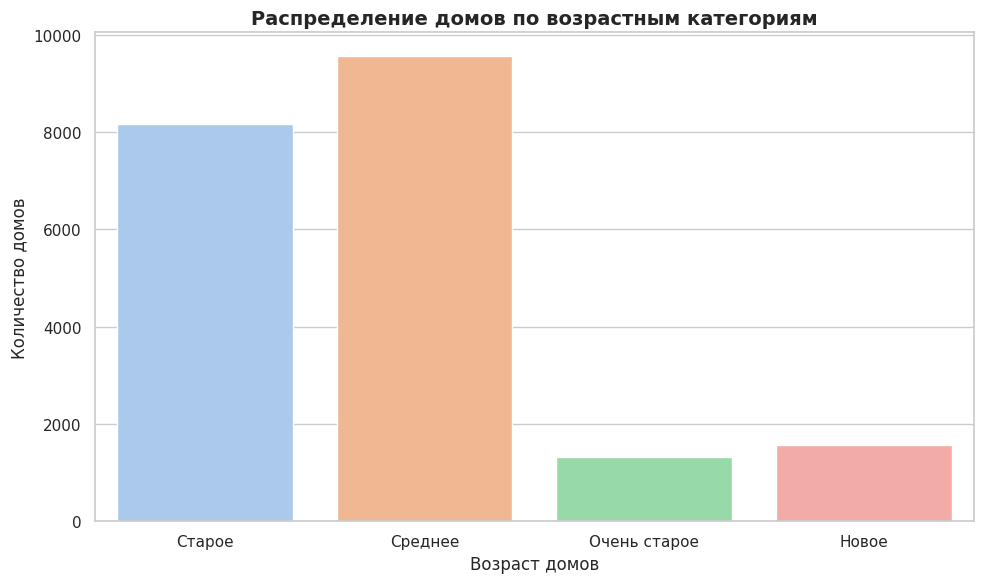

In [21]:
###########################################################
# 6. Count Plot: Распределение домов по возрастным категориям
###########################################################

plt.figure(figsize=(10, 6))
sns.countplot(x="house_age_category", data=df, palette="pastel")
plt.title("Распределение домов по возрастным категориям", fontsize=14, fontweight="bold")
plt.xlabel("Возраст домов", fontsize=12)
plt.ylabel("Количество домов", fontsize=12)
plt.tight_layout()
plt.show()


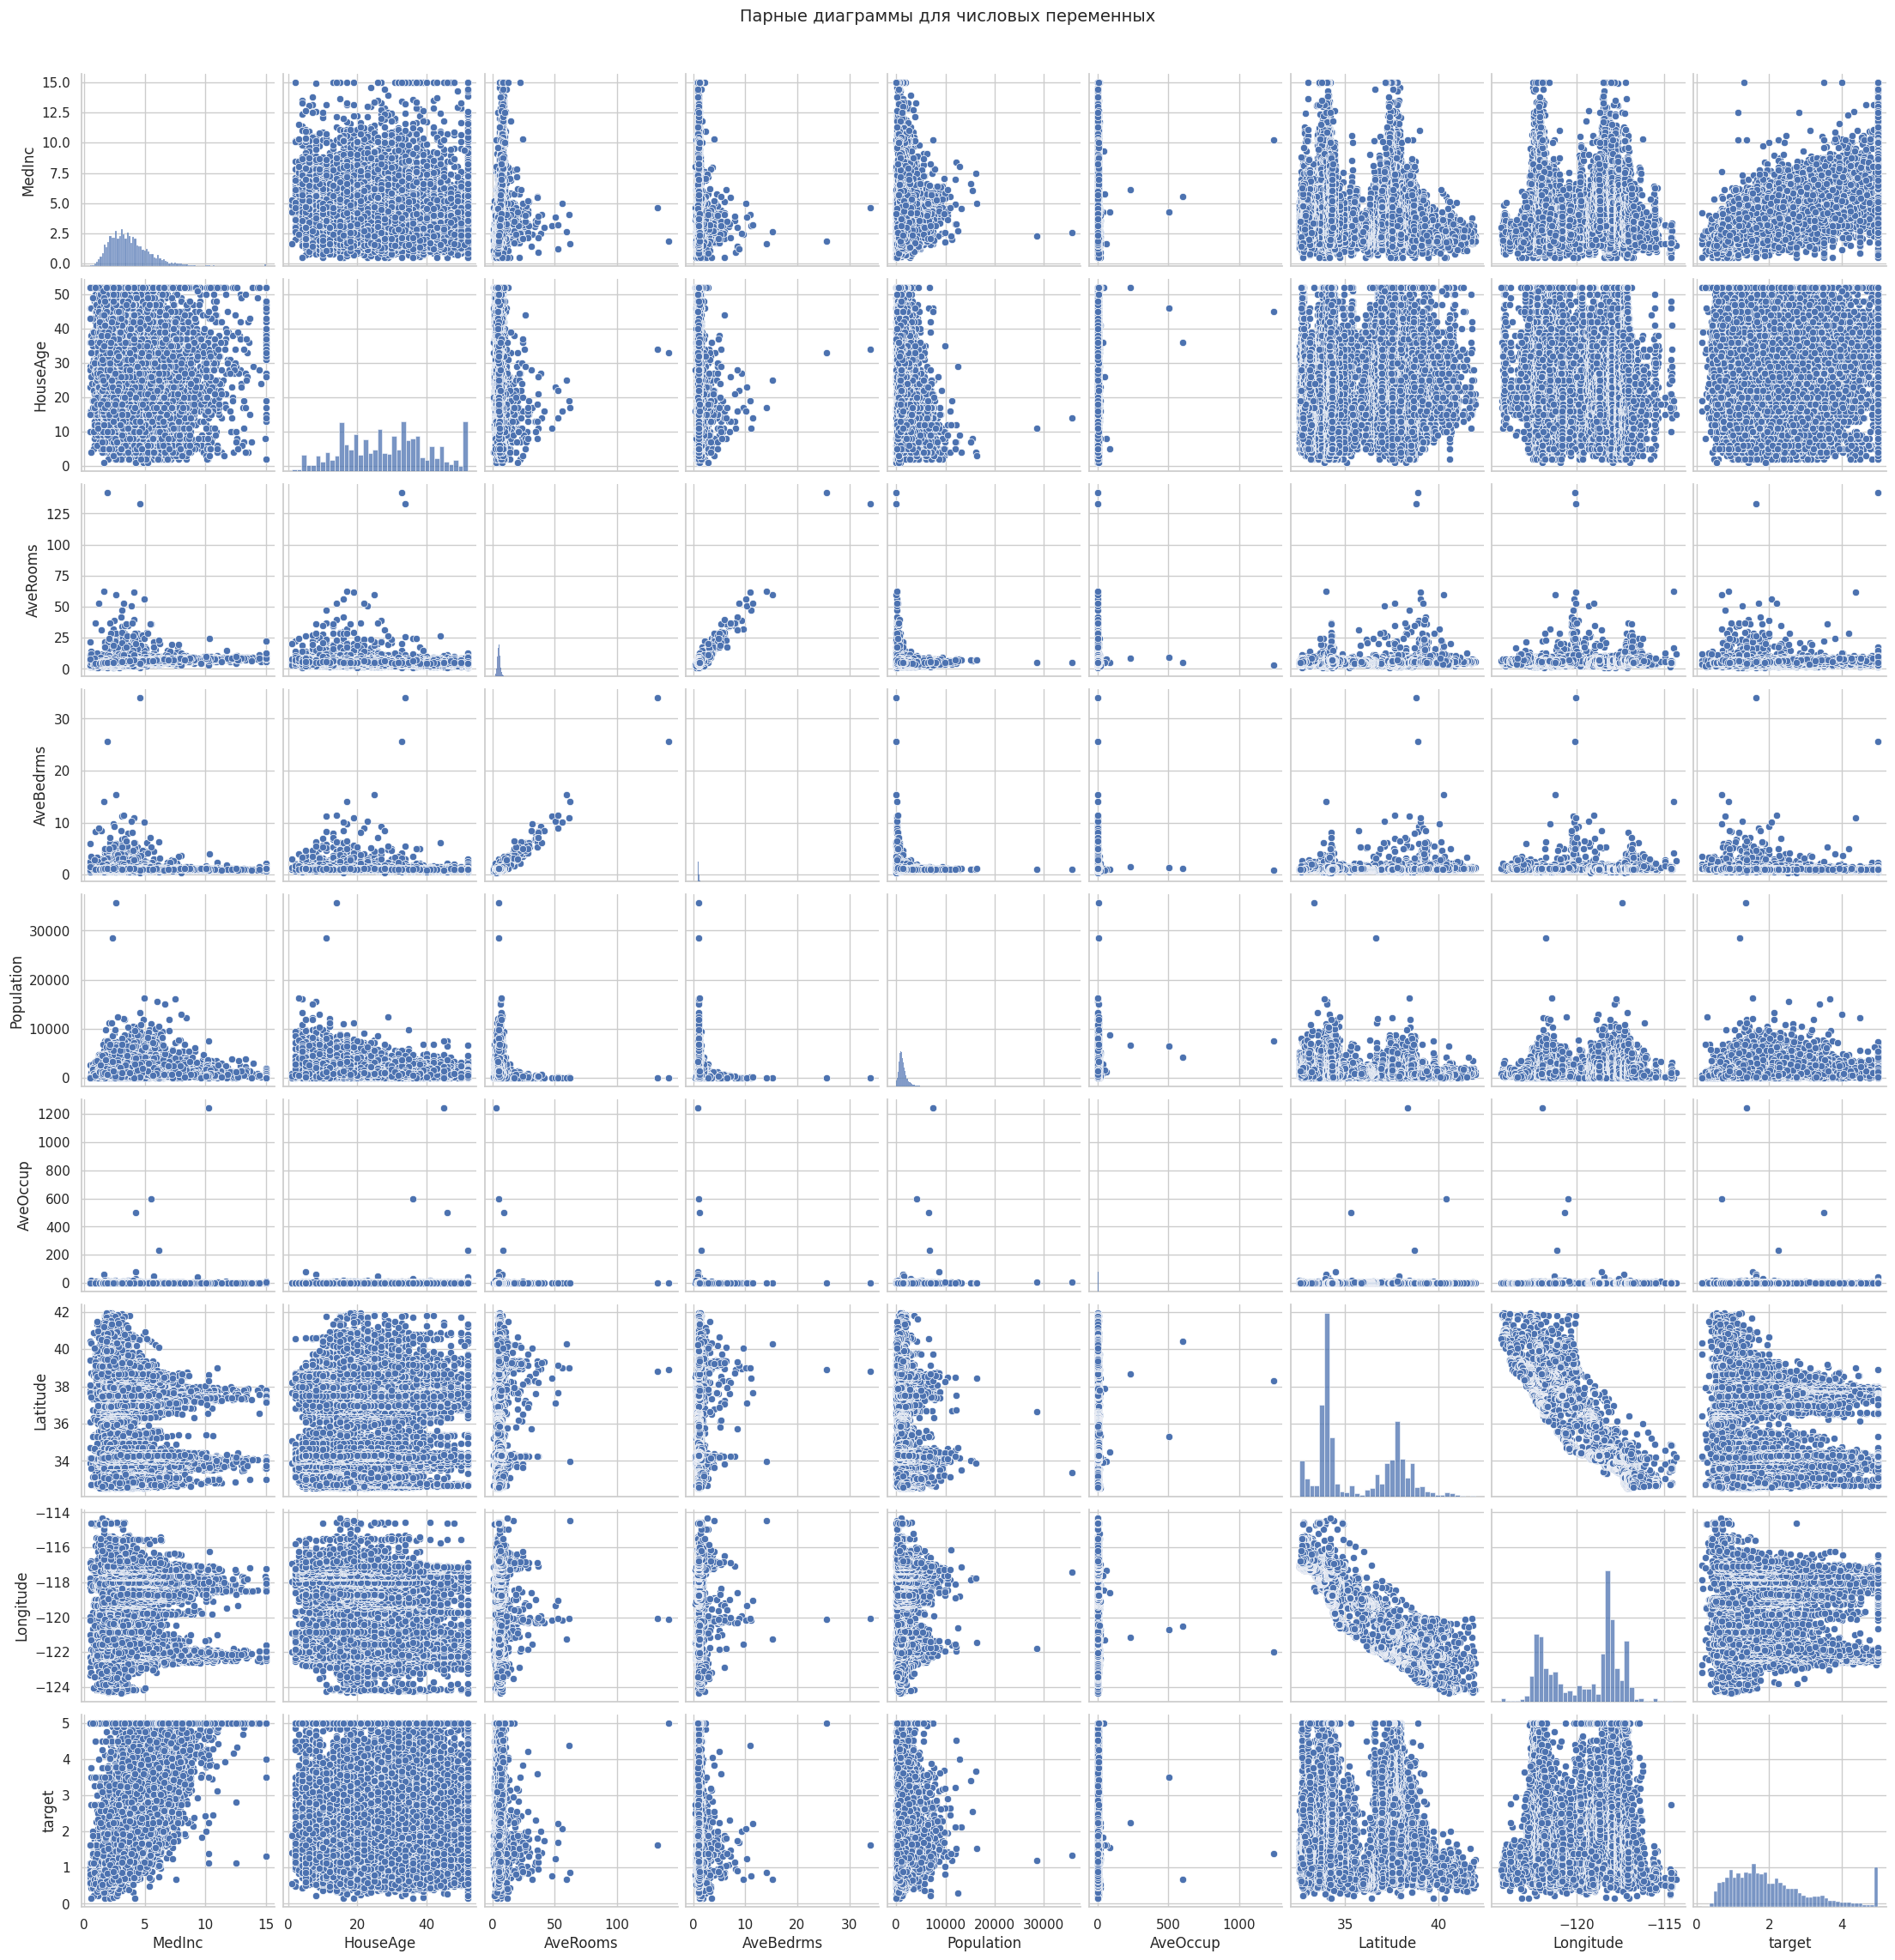

In [22]:
###########################################################
# 7. Pairplot: Парные диаграммы для числовых переменных
###########################################################

# Выбираем только числовые переменные
numeric_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
                'Population', 'AveOccup', 'Latitude', 'Longitude', 'target']

# Строим парные диаграммы
sns.pairplot(df[numeric_cols])
plt.suptitle("Парные диаграммы для числовых переменных", y=1.02, fontsize=14)
plt.show()


<ipython-input-23-dc3f302d4036>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Latitude_group", data=df[df["Latitude_group"].isin(top_latitudes)], palette="Set2")


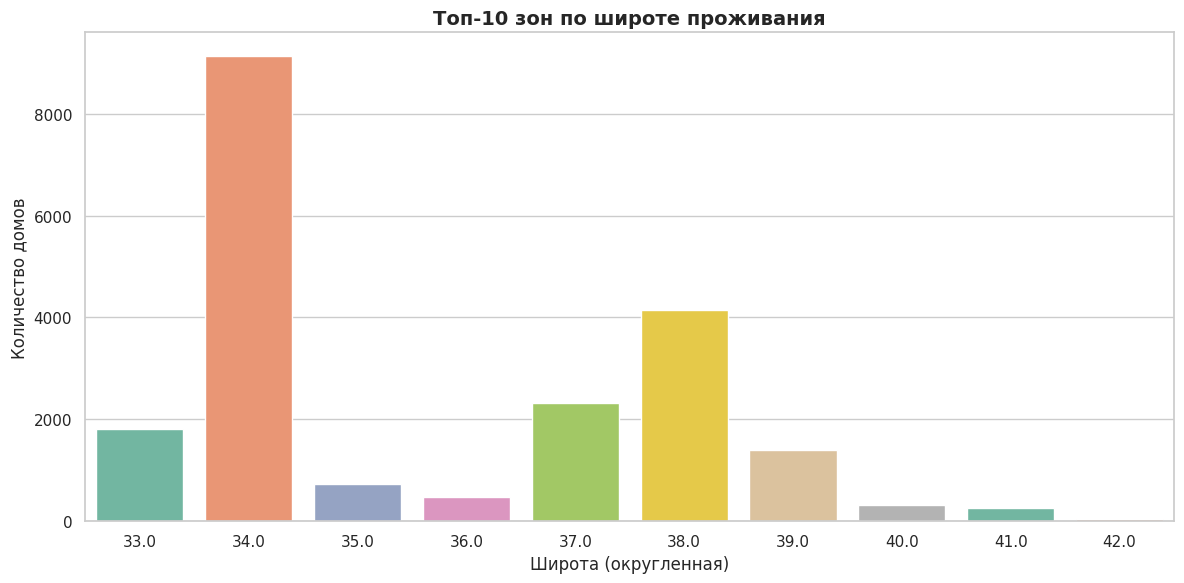

In [23]:
###########################################################
# 9. Count Plot: Топ-10 зон по широте проживания
###########################################################

# Создаем группы широты округлением значений
df['Latitude_group'] = df['Latitude'].round()

# Выбираем топ-10 групп по количеству домов
top_latitudes = df['Latitude_group'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.countplot(x="Latitude_group", data=df[df["Latitude_group"].isin(top_latitudes)], palette="Set2")
plt.title("Топ-10 зон по широте проживания", fontsize=14, fontweight="bold")
plt.xlabel("Широта (округленная)", fontsize=12)
plt.ylabel("Количество домов", fontsize=12)
plt.tight_layout()
plt.show()
